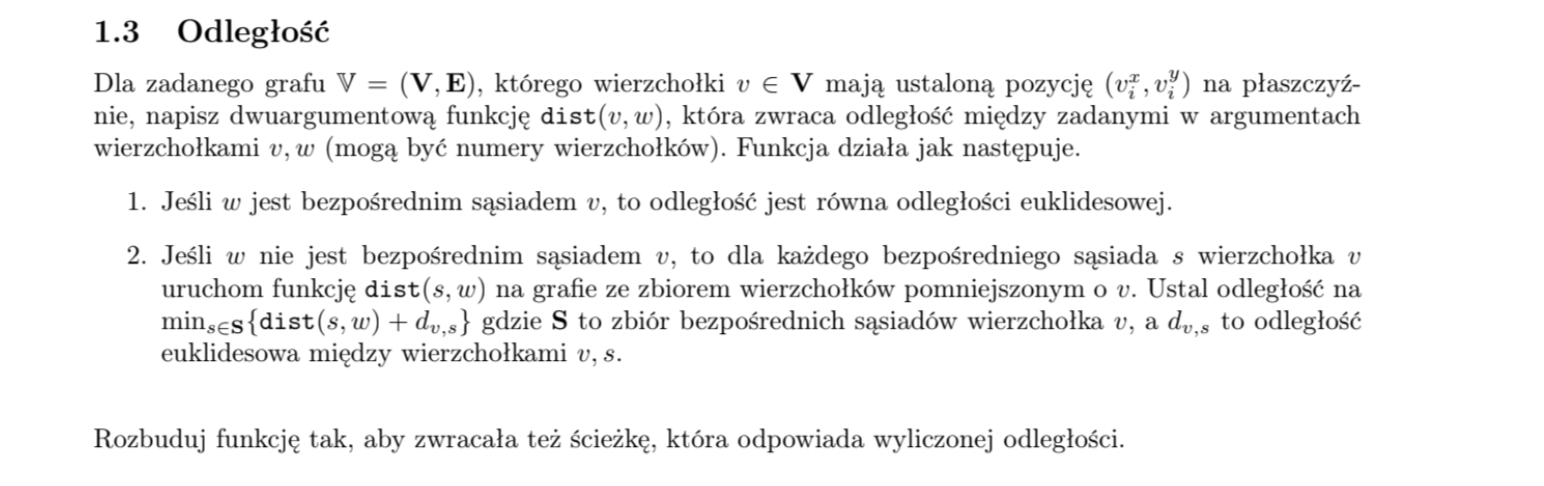

In [1]:
import numpy as np
from IPython.display import Image
Image('pictures/1_3.png', height=300)


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

g = nx.Graph()
V = np.arange(9)
E = list()
V_pos = list()


In [3]:

# losowanie krawędzi
for v in V:
    for i in range(2):
        k = np.random.randint(0, len(V))
        if k != v:
            E.append([v, k])


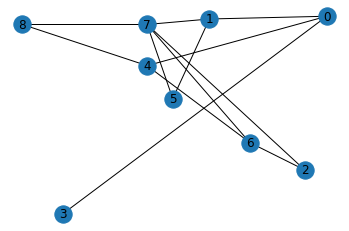

In [4]:

# losowanie pozycji z przedziałów [0, 100], [0, 100]
for i in V:
    V_pos.append(np.random.randint(0, 100, 2))

g.add_nodes_from(V)
g.add_edges_from(E)
nx.draw_networkx_labels(g, V_pos)
nx.draw(g, V_pos)
plt.show()


Funcka euclides zwraca odległość euklidesową między dwoma wierzchołkami

In [5]:
def euclides(a, b):
    return sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


In [6]:
def distance(v, w, grf, path=[]):
    if w in grf.nodes:
        path.append(v)
        return euclides(V_pos[v], V_pos[w])

Funkcja dist(v, w)

Zwraca odległość między sąsiadami, jeśli wierzchołki nie sąsiadują ze sobą wywołuje się rekurencyjnie dla każdego wierzchołka sąsiadującego z wierzchołkiem v.

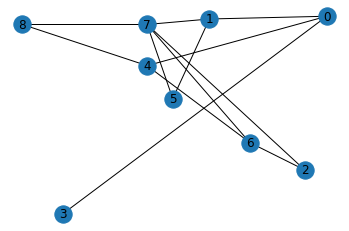

(83.13286395578794, [7, [1, 1]])

In [9]:
def dist(v, w, grf):
    #print('nodes:', grf.nodes)
    if w in grf.neighbors(v):
        r = euclides(V_pos[v], V_pos[w]), v
        #print('returns:', r)
        return r
    elif list(grf.neighbors(v)) == []:
        return None
    else:
        s_dist = list()
        s_path = list()
        new_g = grf.copy()
        new_g.remove_node(v)

        for s in grf.neighbors(v):

            # function returns tuple (dist, path)
            ret = dist(s, w, new_g)
            if ret:
                d = euclides(V_pos[v], V_pos[s]) + ret[0]
                s_path.append([s, ret[1]])
                s_dist.append(d)
        
        # zabezpieczenie przed 'ślepym zaukiem' wierzchołkiem z jednym sąsiadem z
        if s_dist:
            i = s_dist.index(min(s_dist))
            r = s_dist[i], s_path[i]
            return r
        else:
            return 


# for n in range(5):
    n1 = np.random.randint(0, len(V))
    n2 = np.random.randint(0, len(V))
    if n1 != n2:
        print('Distance between:', (n1, n2))
        result = dist(n1, n2, g)
        print(result[0])
        t = result[1]
        print('path:', n1, t, n2)



nx.draw_networkx_labels(g, V_pos)
nx.draw(g, V_pos)
plt.show()
dist(8,0,grf=g)